# Lab 22 - Nonparametric Regression
## Lecture 22 

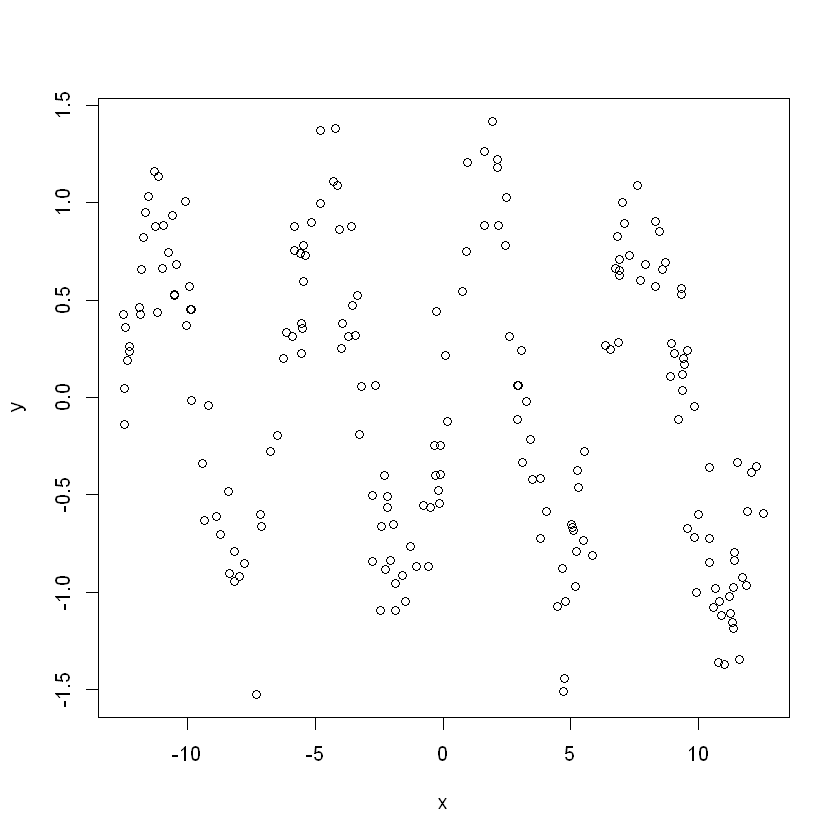

In [3]:
x = sort(runif(200,-4*pi,4*pi))
y = sin(x)+rnorm(200,0,.25)
plot(x,y)

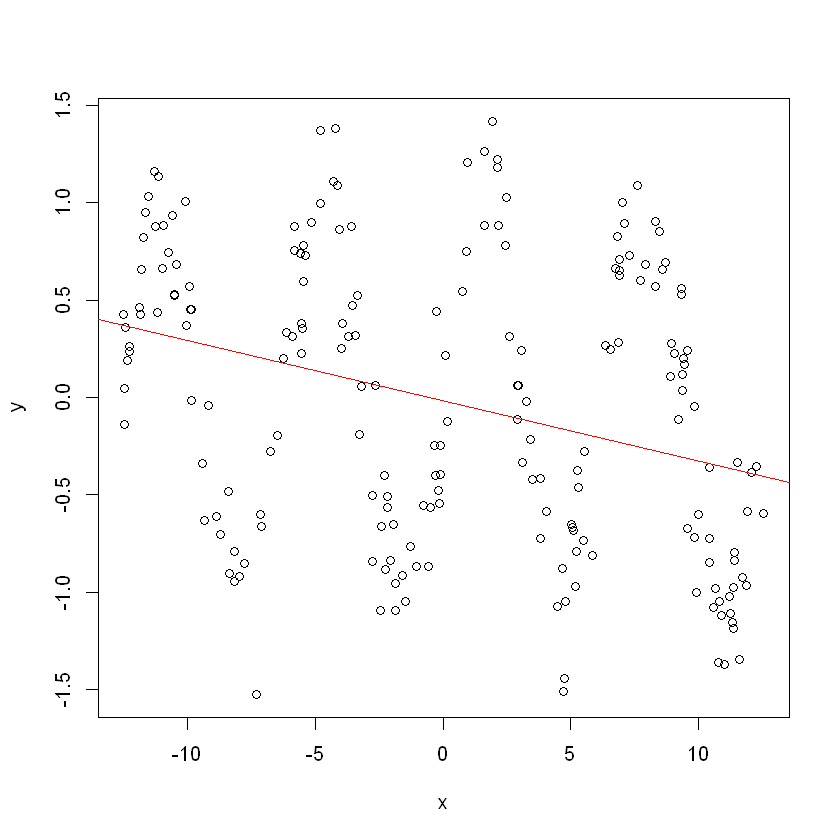

In [4]:
mod = lm(y~x)
plot(x,y)
abline(coef=coef(mod),col='red')

[1] 200  11

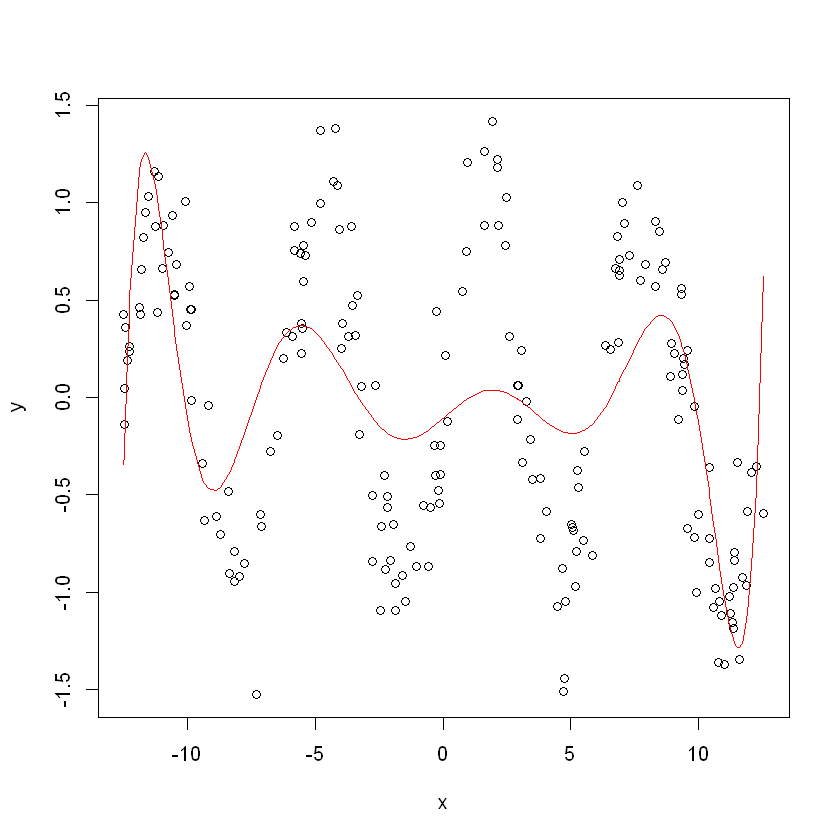

In [56]:
mod = lm(y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5)+I(x^6)+I(x^7)+I(x^8)+I(x^9)+I(x^10))
dim(model.matrix(mod))
plot(x,y)
lines(x,predict(mod,data.frame(x)),col='red')

In [14]:
library('locpol')

In [15]:
?locPolSmootherC

locpolSmoothers {locpol},R Documentation
x,x covariate data values.
y,y response data values.
xeval,Vector of evaluation points.
bw,"Smoothing parameter, bandwidth."
kernel,"Kernel used to perform the estimation, see Kernels"
weig,Vector of weights for observations.
deg,Local polynomial estimation degree (p).
DET,Boolean to ask for the computation of the determinant if the matrix X^TWX.
x,Evaluation points.
"beta0, beta1, beta2,...","Estimation of the i-th derivative of the regression function (m^{(i)}(x)) for i=0,1,...."


In [16]:
?Kernels

Kernels {locpol},R Documentation
x,Numeric vector o value.


$$gaussK(x) = \exp(-x^2/\gamma)$$

In [17]:
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=.1)

In [19]:
head(smoothed)

,x,beta0
,<dbl>,<dbl>
1,-12.49060,0.1749999
2,-12.48197,0.1763568
3,-12.46899,0.1785866
4,-12.44008,0.1843965
5,-12.35533,0.2068940
6,-12.29227,0.2237817


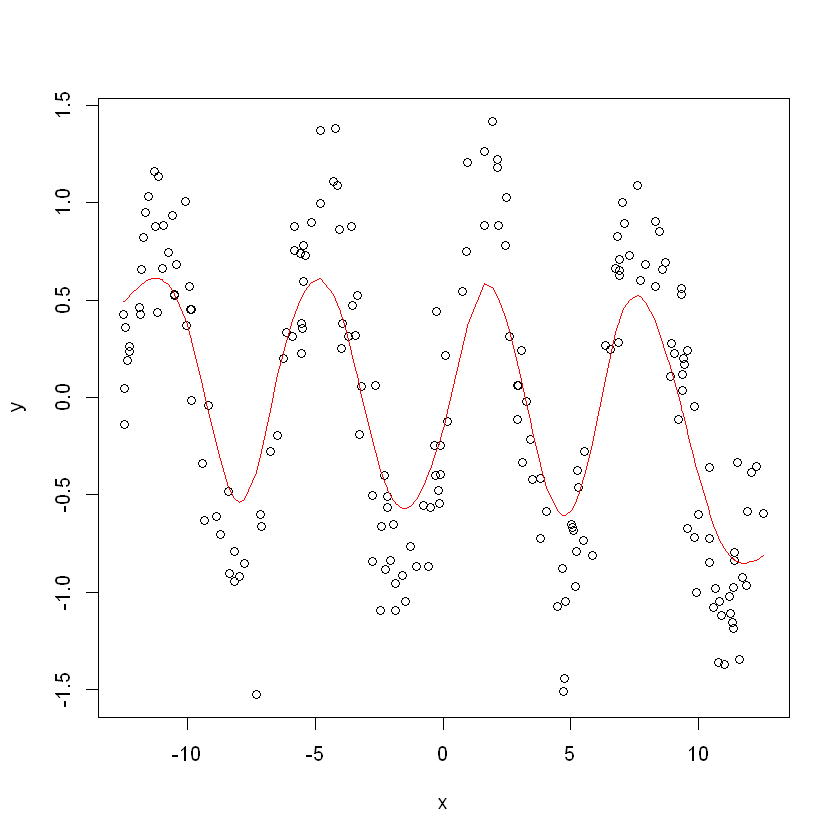

In [21]:
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=1)
plot(x,y)
lines(x,smoothed$beta0,col='red')

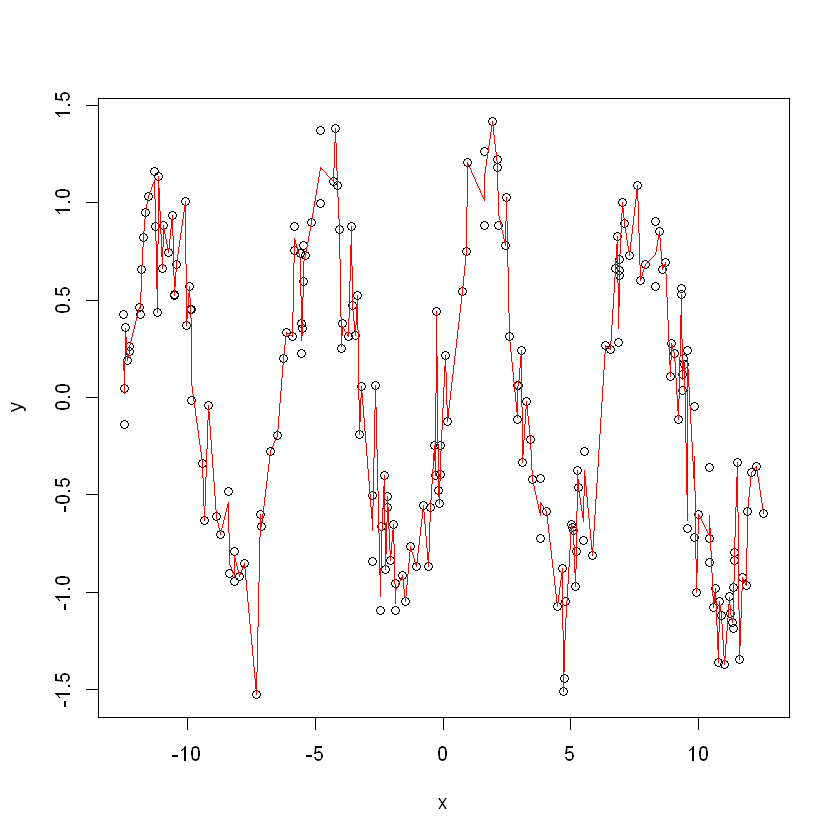

In [22]:
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=.01)
plot(x,y)
lines(x,smoothed$beta0,col='red')

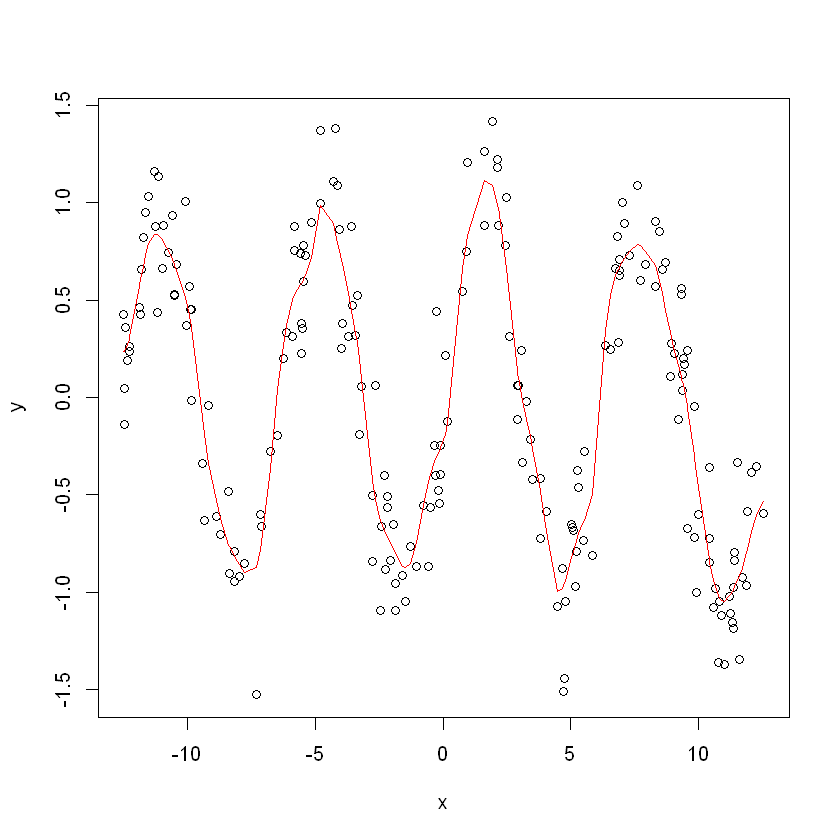

In [25]:
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=.35)
plot(x,y)
lines(x,smoothed$beta0,col='red')

1st degree local polynomial

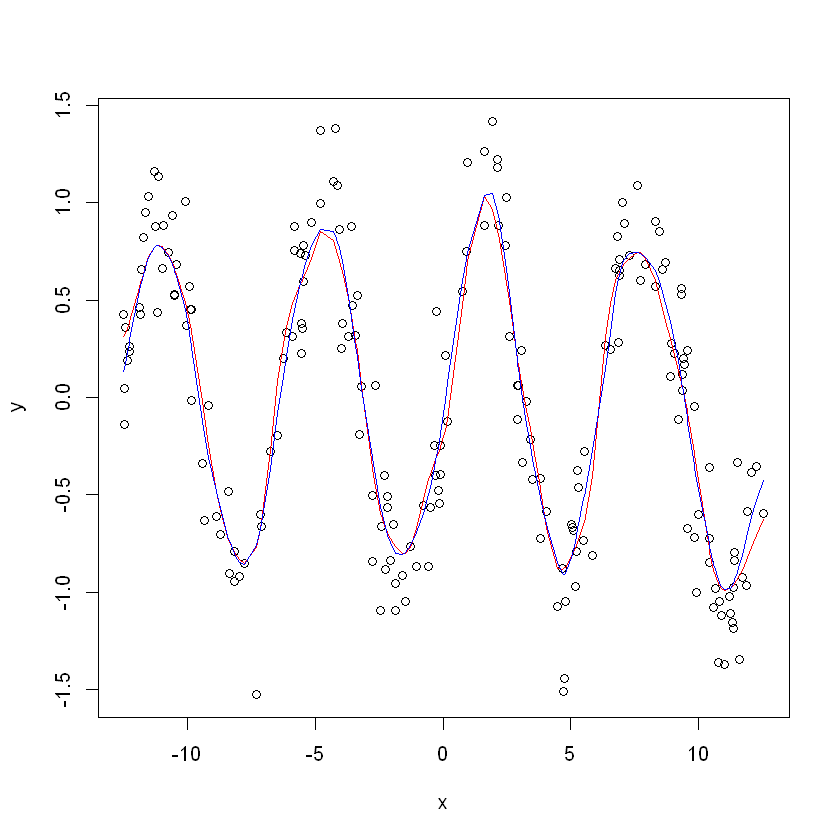

In [30]:
smoothed_poly = locPolSmootherC(x=x,y=y,xeval=x,deg=1,kernel=gaussK,bw=.5)
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=.5)
plot(x,y)
lines(x,smoothed$beta0,col='red')
lines(x,smoothed_poly$beta0,col='blue')

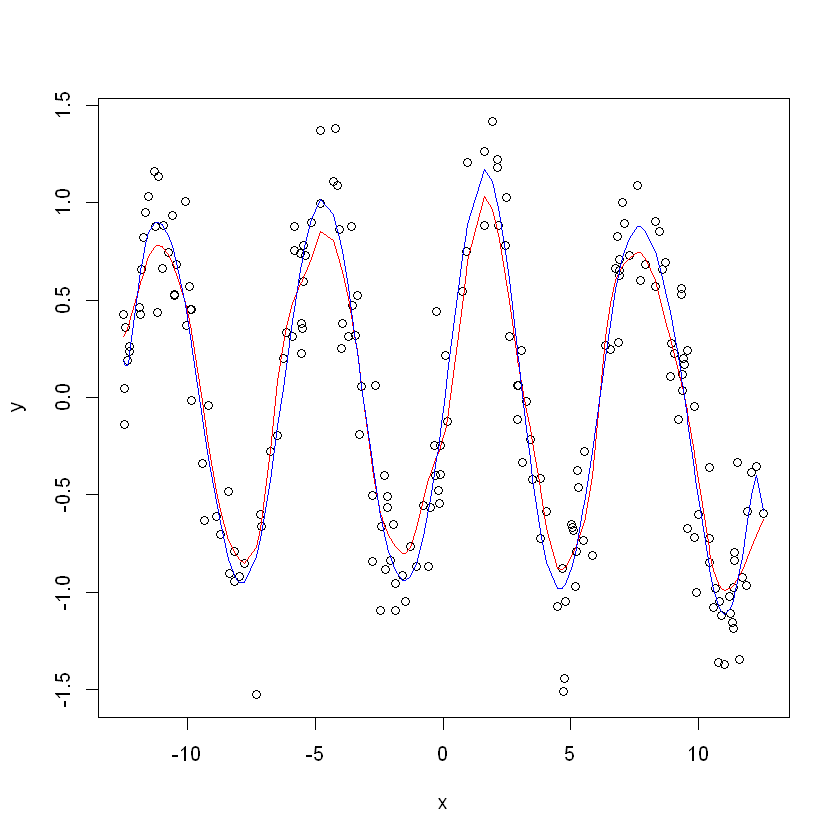

In [38]:
smoothed_poly = locPolSmootherC(x=x,y=y,xeval=x,deg=9,kernel=gaussK,bw=1.5)
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=.5)
plot(x,y)
lines(x,smoothed$beta0,col='red')
lines(x,smoothed_poly$beta0,col='blue')

In [39]:
?regCVBwSelC

regCVBwSelC {locpol},R Documentation
x,x covariate values.
y,y response values.
deg,degree of the local polynomial.
kernel,"Kernel used to perform the estimation, see Kernels."
weig,Vector of weights for observations.
interval,An interval where to look for the bandwidth.


In [43]:
best_bw = regCVBwSelC(x,y,deg=5,kernel=gaussK)

In [44]:
best_bw

[1] 1.260557

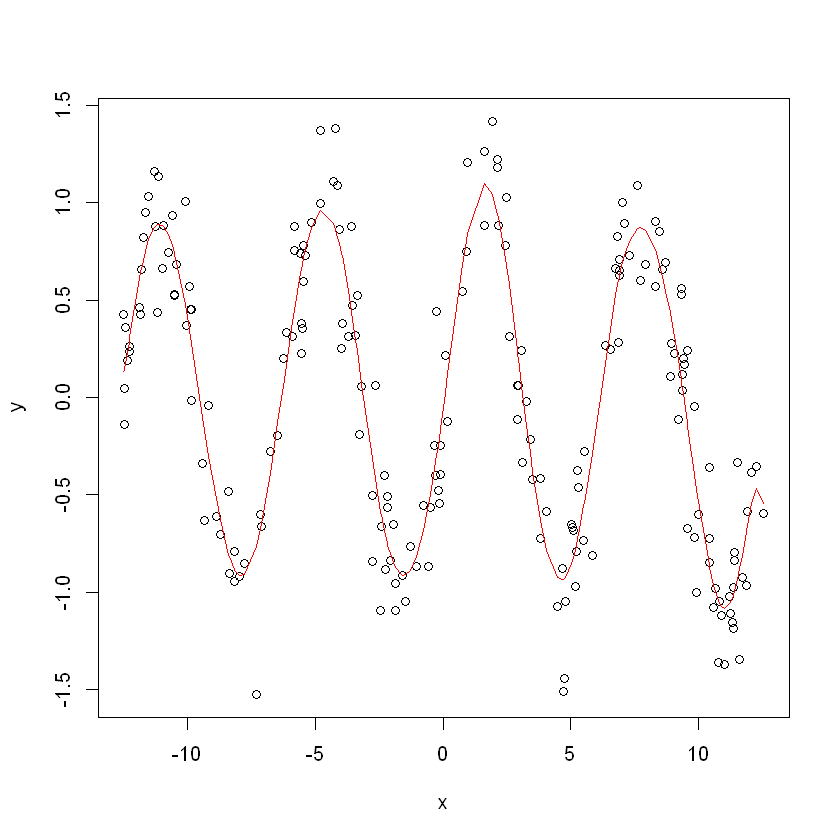

In [46]:
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=5,kernel=gaussK,bw=best_bw)
plot(x,y)
lines(x,smoothed$beta0,col='red')

## splines 

In [47]:
library('splines')

In [48]:
?bs

bs {splines},R Documentation
x,the predictor variable. Missing values are allowed.
df,"degrees of freedom; one can specify df rather than knots; bs() then chooses df-degree (minus one if there is an intercept) knots at suitable quantiles of x (which will ignore missing values). The default, NULL, takes the number of inner knots as length(knots). If that is zero as per default, that corresponds to df = degree - intercept."
knots,"the internal breakpoints that define the spline. The default is NULL, which results in a basis for ordinary polynomial regression. Typical values are the mean or median for one knot, quantiles for more knots. See also Boundary.knots."
degree,degree of the piecewise polynomial—default is 3 for cubic splines.
intercept,"if TRUE, an intercept is included in the basis; default is FALSE."
Boundary.knots,"boundary points at which to anchor the B-spline basis (default the range of the non-NA data). If both knots and Boundary.knots are supplied, the basis parameters do not depend on x. Data can extend beyond Boundary.knots."


Warning message in predict.lm(mod, data.frame(x)):
"prediction from a rank-deficient fit may be misleading"


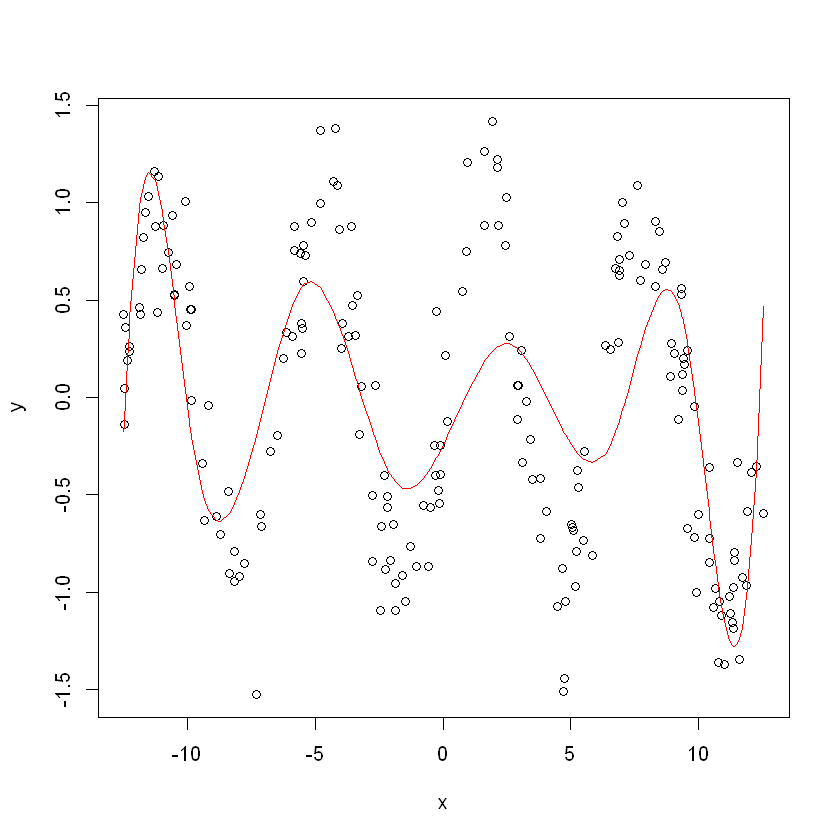

In [51]:
mod = lm(y~bs(x,df=10,intercept=TRUE))
plot(x,y)
lines(x,predict(mod,data.frame(x)),col='red')

Warning message in predict.lm(mod, data.frame(x)):
"prediction from a rank-deficient fit may be misleading"


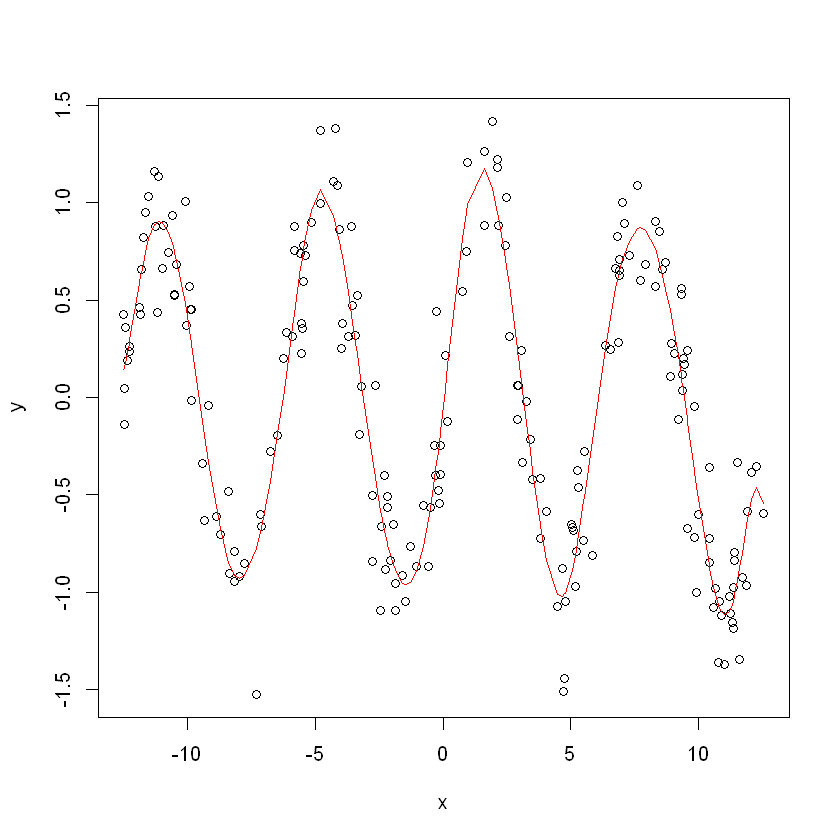

In [52]:
mod = lm(y~bs(x,df=20,intercept=TRUE))
plot(x,y)
lines(x,predict(mod,data.frame(x)),col='red')

In [53]:
summary(mod)


Call:
lm(formula = y ~ bs(x, df = 20, intercept = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.75298 -0.17063  0.00288  0.17835  0.77784 

Coefficients: (1 not defined because of singularities)
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -0.5458     0.2543  -2.146 0.033172 *  
bs(x, df = 20, intercept = TRUE)1    0.6877     0.2893   2.377 0.018514 *  
bs(x, df = 20, intercept = TRUE)2    0.8712     0.3609   2.414 0.016785 *  
bs(x, df = 20, intercept = TRUE)3    1.6247     0.3330   4.879 2.34e-06 ***
bs(x, df = 20, intercept = TRUE)4    1.2849     0.3188   4.031 8.20e-05 ***
bs(x, df = 20, intercept = TRUE)5   -1.0139     0.3343  -3.033 0.002782 ** 
bs(x, df = 20, intercept = TRUE)6    0.1905     0.3286   0.580 0.562842    
bs(x, df = 20, intercept = TRUE)7    2.0640     0.3162   6.529 6.55e-10 ***
bs(x, df = 20, intercept = TRUE)8    0.9390     0.3024   3.106 0.002207 ** 
bs(x, df = 20, interce

In [55]:
dim(model.matrix(mod))

[1] 200  21